# Part 01 :

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [133]:
# load the iris dataset
ds = load_iris()
print(ds.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [134]:
print(ds["target_names"])

['setosa' 'versicolor' 'virginica']


In [135]:
# assign the feature matrix X and the target vector y
X = ds["data"]
y = ds["target"]

In [136]:
print(f"THE SHAPE OF X IS {X.shape}")
print(f"THE SHAPE OF y IS {y.shape}")

THE SHAPE OF X IS (150, 4)
THE SHAPE OF y IS (150,)


In [137]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [138]:
dtc = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [139]:
text_display = export_text(dtc, feature_names=ds["feature_names"])
print(f"THE TREE STRUCTURE IS  : \n\n{text_display}")

THE TREE STRUCTURE IS  : 

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



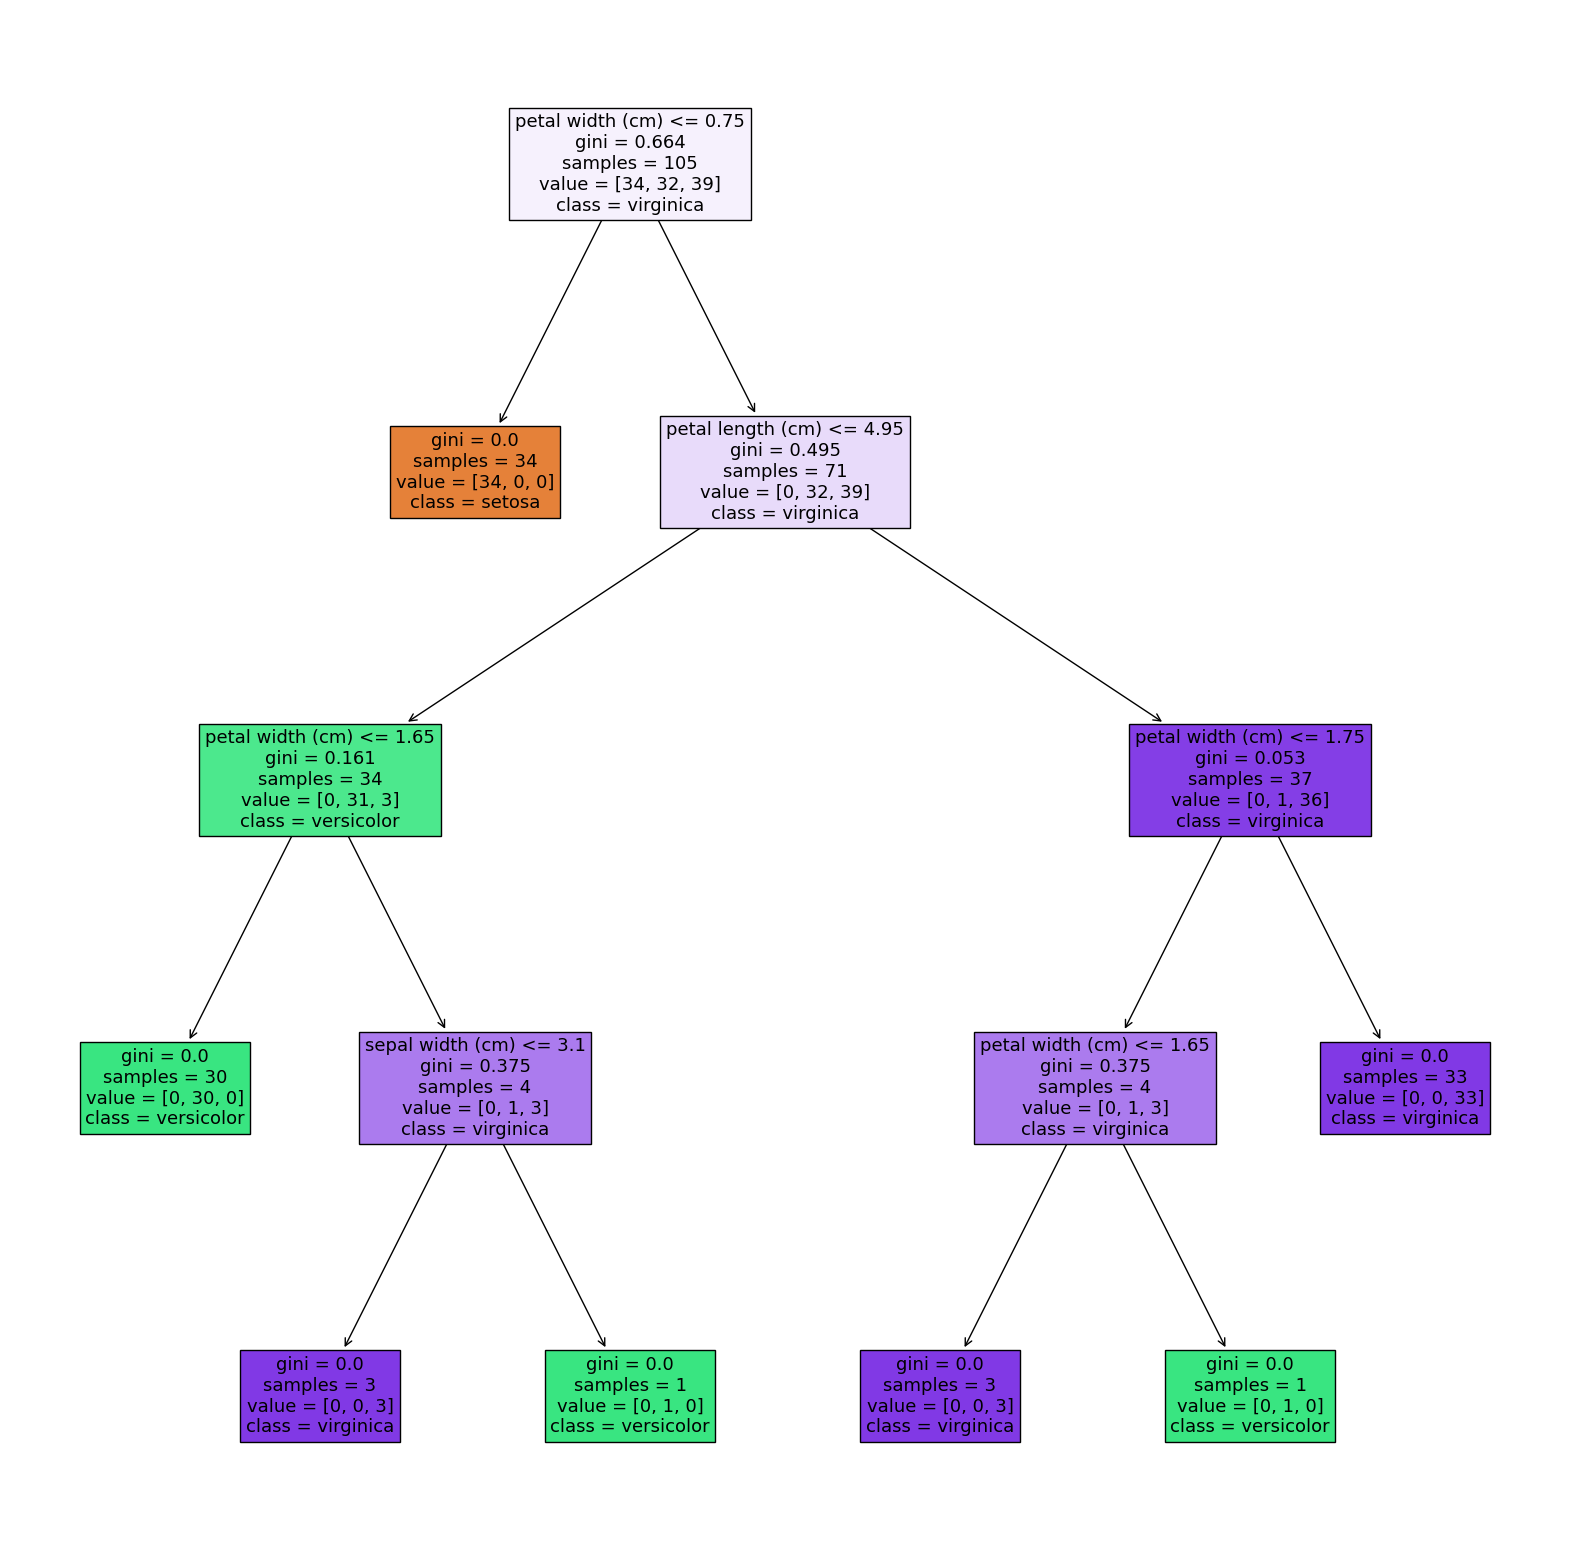

In [140]:
# Plot the samples
plt.figure(figsize=(20, 20))
plt.tree = plot_tree(
    dtc,
    feature_names=ds["feature_names"],
    class_names=ds["target_names"],
    filled=True,
    fontsize=13,
)
plt.show()

In [141]:
from sklearn.metrics import accuracy_score

Now, let's calculate the train and test accuracy

In [142]:
max_depths = [1, 2, 3, 4, 5, 6, 7]
train_scores = []
test_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

Let's now plot the train and test accuracy

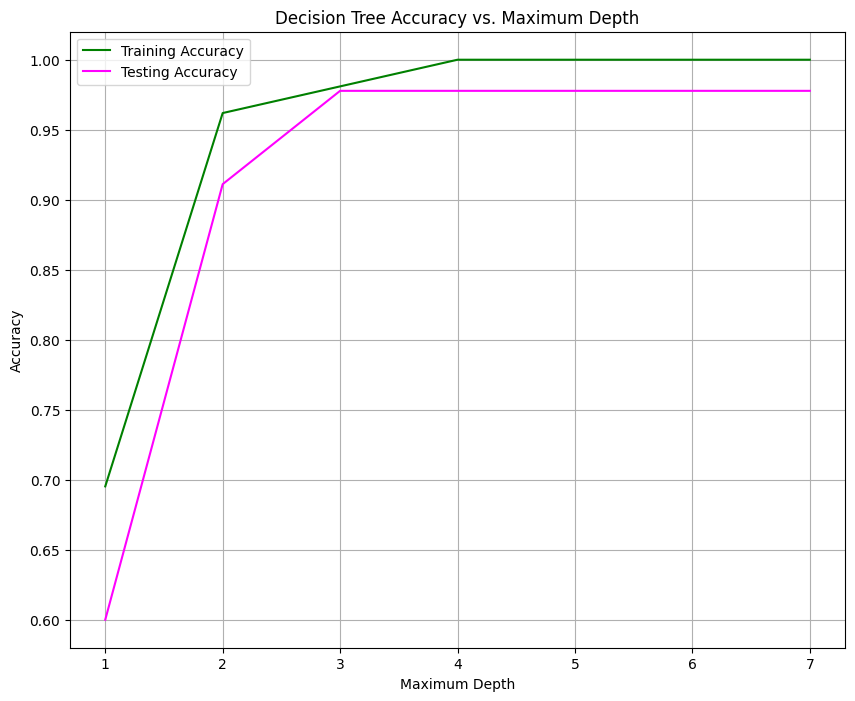

In [143]:
plt.figure(figsize=(10, 8))
plt.plot(max_depths, train_scores, label="Training Accuracy", c="green")
plt.plot(max_depths, test_scores, label="Testing Accuracy", c="magenta")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Maximum Depth")
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

### *Interpretation* :
- We notice that for the value **maximum_depth=4** , the training accuracy and test accuracy are at thei peak, which 

In [144]:
max_depths = [1, 2, 3, 4, 5, 6, 7]
train_scores = []
test_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion="gini")
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

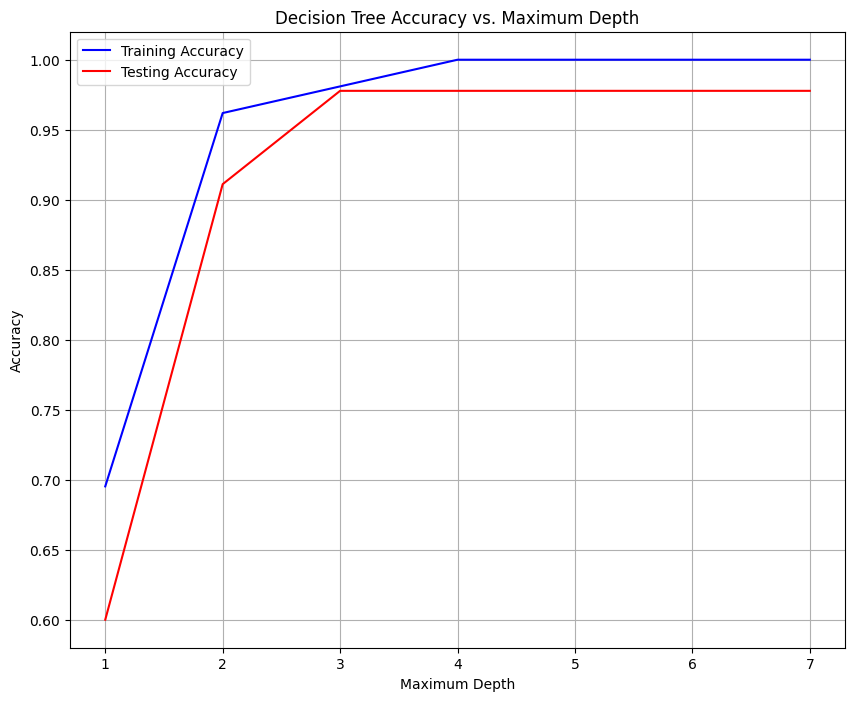

In [145]:
plt.figure(figsize=(10, 8))
plt.plot(max_depths, train_scores, label="Training Accuracy", c="blue")
plt.plot(max_depths, test_scores, label="Testing Accuracy", c="red")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Maximum Depth")
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

# Part 02 :

In [146]:
import pandas as pd

data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium",
        "Fine",
        "Coarse",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Medium",
        "Coarse",
        "Fine",
        "Coarse",
        "Coarse",
        "Fine",
    ],
    "Elevation": [
        "High",
        "Low",
        "Low",
        "Medium",
        "High",
        "High",
        "Medium",
        "High",
        "Low",
        "Medium",
        "Low",
        "Low",
        "Medium",
        "High",
        "Medium",
        "High",
    ],
    "Tone": [
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Light",
        "Dark",
        "Dark",
        "Light",
    ],
    "Pattern": [
        "Definite",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Vague",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
    ],
    "Land Cover": [
        "Grassland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Grassland",
    ],
}

In [147]:
df = pd.DataFrame(data)
df

,Pixel,Texture,Elevation,Tone,Pattern,Land Cover
0,1,Medium,High,Dark,Definite,Grassland
1,2,Fine,Low,Light,Vague,Grassland
2,3,Coarse,Low,Dark,Definite,Woodland
3,4,Fine,Medium,Light,Definite,Woodland
4,5,Coarse,High,Dark,Vague,Woodland
5,6,Medium,High,Dark,Definite,Woodland
6,7,Fine,Medium,Light,Vague,Grassland
7,8,Coarse,High,Dark,Definite,Woodland
8,9,Medium,Low,Dark,Vague,Woodland
9,10,Fine,Medium,Light,Definite,Woodland


Let's plot the decision tree graph

In [148]:
# first we need to encode the categorical data
df.dtypes

Pixel          int64
Texture       object
Elevation     object
Tone          object
Pattern       object
Land Cover    object
dtype: object

In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Texture"] = le.fit_transform(df["Texture"])
df["Elevation"] = le.fit_transform(df["Elevation"])
df["Tone"] = le.fit_transform(df["Tone"])
df["Pattern"] = le.fit_transform(df["Pattern"])
df["Land Cover"] = le.fit_transform(df["Land Cover"])

# X = df.drop('Land Cover', axis=1)
# y = df['Land Cover']
df

,Pixel,Texture,Elevation,Tone,Pattern,Land Cover
0,1,2,0,0,0,0
1,2,1,1,1,1,0
2,3,0,1,0,0,1
3,4,1,2,1,0,1
4,5,0,0,0,1,1
5,6,2,0,0,0,1
6,7,1,2,1,1,0
7,8,0,0,0,0,1
8,9,2,1,0,1,1
9,10,1,2,1,0,1


In [150]:
# ou bien avec cette methode
encoded_data = {key: le.fit_transform(value) for key, value in data.items()}
df2 = pd.DataFrame(encoded_data)
df2

,Pixel,Texture,Elevation,Tone,Pattern,Land Cover
0,0,2,0,0,0,0
1,1,1,1,1,1,0
2,2,0,1,0,0,1
3,3,1,2,1,0,1
4,4,0,0,0,1,1
5,5,2,0,0,0,1
6,6,1,2,1,1,0
7,7,0,0,0,0,1
8,8,2,1,0,1,1
9,9,1,2,1,0,1


In [151]:
X.shape

(150, 4)

In [152]:
y.shape

(150,)

In [162]:
# now we ectract the features and target variable
X: list[tuple] = list(
    zip(
        encoded_data["Texture"],
        encoded_data["Elevation"],
        encoded_data["Tone"],
        encoded_data["Pattern"],
    )
)
y: np.ndarray = encoded_data["Land Cover"]

In [154]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X, y)

DecisionTreeClassifier()

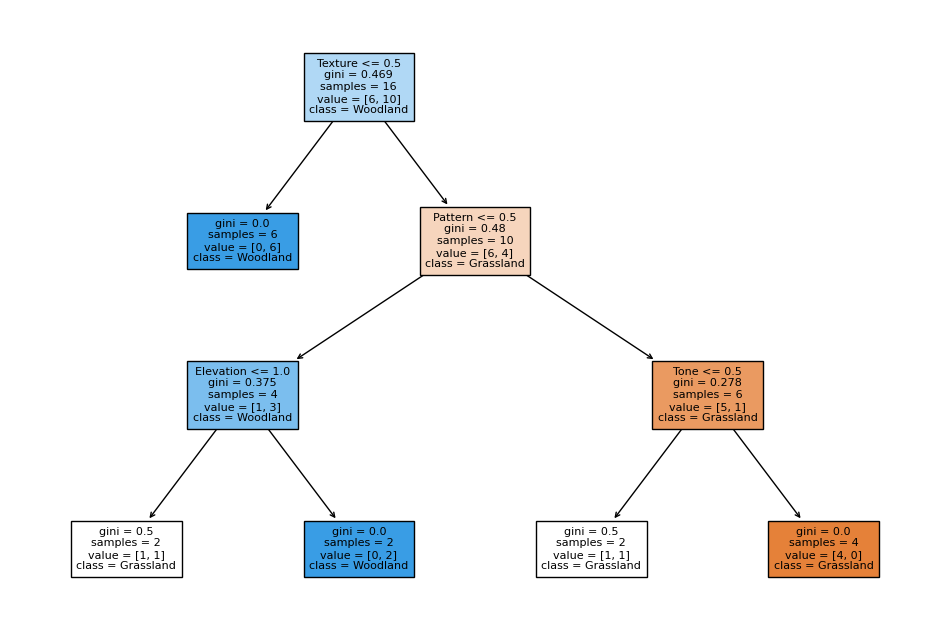

In [157]:
# visualizing the decison tree
plt.figure(figsize=(12, 8))
plot_tree(
    dtc2,
    feature_names=["Texture", "Elevation", "Tone", "Pattern"],
    class_names=le.classes_,
    filled=True,
    fontsize=8,
)
plt.show()